In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
battles = pd.read_csv('data/game-of-thrones/battles.csv', sep=',', )
deaths = pd.read_csv('data/game-of-thrones/character-deaths.csv', sep=',', )

In [4]:
battles.shape

(38, 25)

In [5]:
deaths.shape

(917, 13)

In [7]:
book_nums_to_death_count = deaths["Book of Death"].value_counts().sort_index()

In [8]:
type(book_nums_to_death_count)

pandas.core.series.Series

(0, 120)

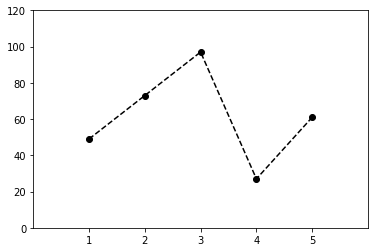

In [9]:
ax1 = book_nums_to_death_count.plot(color="k", marker="o", linestyle="--")
ax1.set_xticks(np.arange(1, 6))
ax1.set_xlim([0, 6])
ax1.set_ylim([0, 120])

In [10]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [11]:
battles = battles.set_index(["name"])

In [12]:
large_battles_mask = battles["attacker_size"] + battles["defender_size"] > 10000

In [18]:
print(large_battles_mask)
type(large_battles_mask)

name
Battle of the Golden Tooth                               True
Battle at the Mummer's Ford                             False
Battle of Riverrun                                       True
Battle of the Green Fork                                 True
Battle of the Whispering Wood                           False
Battle of the Camps                                      True
Sack of Darry                                           False
Battle of Moat Cailin                                   False
Battle of Deepwood Motte                                False
Battle of the Stony Shore                               False
Battle of Torrhen's Square                              False
Battle of Winterfell                                    False
Sack of Torrhen's Square                                False
Sack of Winterfell                                      False
Battle of Oxcross                                        True
Siege of Storm's End                                     True
Bat

pandas.core.series.Series

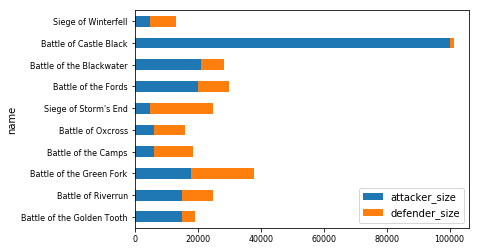

In [14]:
large_battles = battles.loc[large_battles_mask, ["attacker_size", "defender_size"]]
ax2 = large_battles.plot(kind="barh", stacked=True, fontsize=8)

In [15]:
large_battles["attacker_pcts"] = \
    large_battles["attacker_size"] / (large_battles["attacker_size"] + large_battles["defender_size"])
large_battles["defender_pcts"] = \
    large_battles["defender_size"] / (large_battles["attacker_size"] + large_battles["defender_size"])

In [16]:
large_battles.head()

,attacker_size,defender_size,attacker_pcts,defender_pcts
name,,,,
Battle of the Golden Tooth,15000.0,4000.0,0.789474,0.210526
Battle of Riverrun,15000.0,10000.0,0.600000,0.400000
Battle of the Green Fork,18000.0,20000.0,0.473684,0.526316
Battle of the Camps,6000.0,12625.0,0.322148,0.677852
Battle of Oxcross,6000.0,10000.0,0.375000,0.625000


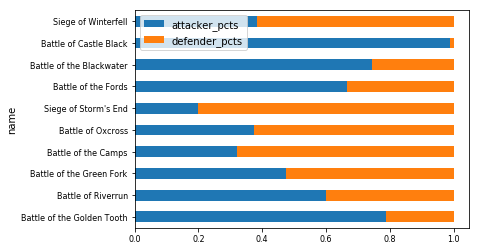

In [17]:
ax3 = large_battles[["attacker_pcts", "defender_pcts"]].plot(kind="barh", stacked=True, fontsize=8)